In [2]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [7]:
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


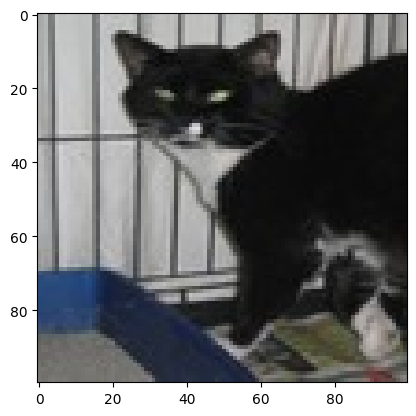

In [16]:
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [17]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Swaraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)))   
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Swaraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5523 - loss: 1.2288 - val_accuracy: 0.5300 - val_loss: 0.6909
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5776 - loss: 0.6862 - val_accuracy: 0.6700 - val_loss: 0.6614
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6538 - loss: 0.6480 - val_accuracy: 0.7000 - val_loss: 0.5852
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.7075 - loss: 0.5697 - val_accuracy: 0.5550 - val_loss: 0.7845
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.7240 - loss: 0.5413 - val_accuracy: 0.7250 - val_loss: 0.5600
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.7818 - loss: 0.4643 - val_accuracy: 0.7125 - val_loss: 0.5393
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8219 - loss: 0.4066 - val_accuracy: 0.6950 - val_loss: 0.5696
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8357 - loss: 0.3737 - val_accuracy: 0.6775 - v

In [21]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6612 - loss: 0.7106


[0.5876138210296631, 0.7024999856948853]

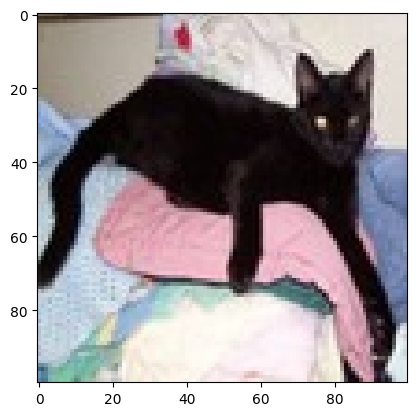

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Cat


In [40]:
idx2 = random.randint(0, len(X_test)) 
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    print("Dog")
else:
    print("Cat")